In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

(100, 160, 3)
(16000, 3)


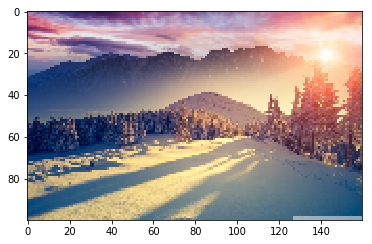

In [43]:
im = cv2.imread('./im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

out_r = 100
im = cv2.resize(im, (int(out_r*float(c)/r), out_r))
print im.shape

pixels = im.reshape((-1, 3))
print pixels.shape

plt.imshow(im)
plt.show()

In [17]:
km = KMeans(n_clusters=8)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
centr_colors = np.array(km.cluster_centers_, dtype='uint8')
print centr_colors.dtype
print centr_colors

print centr_colors.shape

uint8
[[ 27  46  89]
 [195 166 183]
 [114 118 133]
 [246 218 180]
 [ 64  84 118]
 [140  85  90]
 [224 179 138]
 [173 140 133]]
(8, 3)


In [29]:
freq = np.array(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
print freq
print freq.sum()
freq = freq/pixels.shape[0]
print freq

[ 1838.  1217.  2448.  2379.  2275.  1332.  1988.  2523.]
16000.0
[ 0.114875    0.0760625   0.153       0.1486875   0.14218751  0.08325
  0.12425     0.1576875 ]


In [39]:
dom = [[freq[ix], centr_colors[ix]] for ix in range(km.n_clusters)]

DOM = sorted(dom, key=lambda z:z[0], reverse=True)
#DOM = np.array(DOM)
print DOM[0][1]
#print DOM.shape

[173 140 133]


In [31]:
for ix in DOM:
    print ix
    print "----------"

[0.1576875, array([173, 140, 133], dtype=uint8)]
----------
[0.153, array([114, 118, 133], dtype=uint8)]
----------
[0.1486875, array([246, 218, 180], dtype=uint8)]
----------
[0.14218751, array([ 64,  84, 118], dtype=uint8)]
----------
[0.12425, array([224, 179, 138], dtype=uint8)]
----------
[0.114875, array([27, 46, 89], dtype=uint8)]
----------
[0.083250001, array([140,  85,  90], dtype=uint8)]
----------
[0.0760625, array([195, 166, 183], dtype=uint8)]
----------


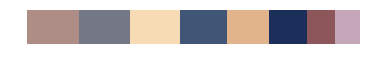

In [41]:
patch = np.ones((50, 500, 3))
start = 0
for ix in range(km.n_clusters):
    width = int(DOM[ix][0]*patch.shape[1])
    end = start+width
    patch[:,start:end,:] = 255 - DOM[ix][1]
    start = end
    plt.axis("off")
    plt.imshow(patch)
plt.show()

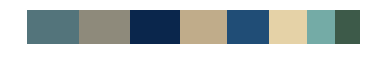

In [42]:
patch = np.ones((50, 500, 3))
start = 0
for ix in range(km.n_clusters):
    width = int(DOM[ix][0]*patch.shape[1])
    end = start+width
    patch[:,start:end,:] = DOM[ix][1]
    start = end
    plt.axis("off")
    plt.imshow(patch)
plt.show()